In [64]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd

import sys
from pathlib import Path

repo_parent = Path.cwd().resolve().parents[0]
if str(repo_parent) not in sys.path:
    sys.path.insert(0, str(repo_parent))

# 3) Autoreload to pick up edits to Maurice2/*
%load_ext autoreload
%autoreload 2

from main.dynamics import Dynamics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
Cnalpha_fin = 2.72025
N = 4
delta = np.radians(1.0)
rho = 1.225
s = 8.76/100
Cr = 18.0/100
Ct = 5.97/100
d = 7.87/100
# 0.5*Cnalpha_fin*N*delta*rho*s*(Cr/2 + Ct/2)*(d/2 + s*(Cr + 2*Ct)/(3*(Cr + Ct)))
Y_MA = (s/3) * (Cr + 2*Ct) / (Cr + Ct) # Fin mid-chord distance from centerline
r_t = d/2
A_fin = (Cr + Ct)/2 * s # Fin reference area
(N * (Y_MA + r_t) * Cnalpha_fin * delta * A_fin)

np.float64(0.00015117742436835595)

In [66]:
xhat0 = np.array([0, 0, 0, 0, 0, 1e-3, 1, 0, 0, 0]) # Initial state estimate
sampling_rate = 20.0  # Hz
dt = 1.0 / sampling_rate

dynamics = Dynamics(dt=dt, x0=xhat0)
dynamics.setup_eom()
dynamics.run_rk4(xhat=xhat0)

t: 0.050
t: 0.100
t: 0.150
t: 0.200
t: 0.250
t: 0.300
t: 0.350
t: 0.400
t: 0.450
t: 0.500
t: 0.550
t: 0.600
t: 0.650
t: 0.700
t: 0.750
t: 0.800
t: 0.850
t: 0.900
t: 0.950
t: 1.000
t: 1.050
t: 1.100
t: 1.150
t: 1.200
t: 1.250
t: 1.300
t: 1.350
t: 1.400
t: 1.450
t: 1.500
t: 1.550
t: 1.600
t: 1.650
t: 1.700
t: 1.750
t: 1.800
t: 1.850
t: 1.900
t: 1.950
t: 2.000
t: 2.050
t: 2.100
t: 2.150
t: 2.200
t: 2.250
t: 2.300
t: 2.350
t: 2.400
t: 2.450
t: 2.500
t: 2.550
t: 2.600
t: 2.650
t: 2.700
t: 2.750
t: 2.800
t: 2.850
t: 2.900
t: 2.950
t: 3.000
t: 3.050
t: 3.100
t: 3.150
t: 3.200
t: 3.250
t: 3.300
t: 3.350
t: 3.400
t: 3.450
t: 3.500
t: 3.550
t: 3.600
t: 3.650
t: 3.700
t: 3.750
t: 3.800
t: 3.850
t: 3.900
t: 3.950
t: 4.000
t: 4.050
t: 4.100
t: 4.150
t: 4.200
t: 4.250
t: 4.300
t: 4.350
t: 4.400
t: 4.450
t: 4.500
t: 4.550
t: 4.600
t: 4.650
t: 4.700
t: 4.750
t: 4.800
t: 4.850
t: 4.900
t: 4.950
t: 5.000
t: 5.050
t: 5.100
t: 5.150
t: 5.200
t: 5.250
t: 5.300
t: 5.350
t: 5.400
t: 5.450
t: 5.500
t: 5.550
t

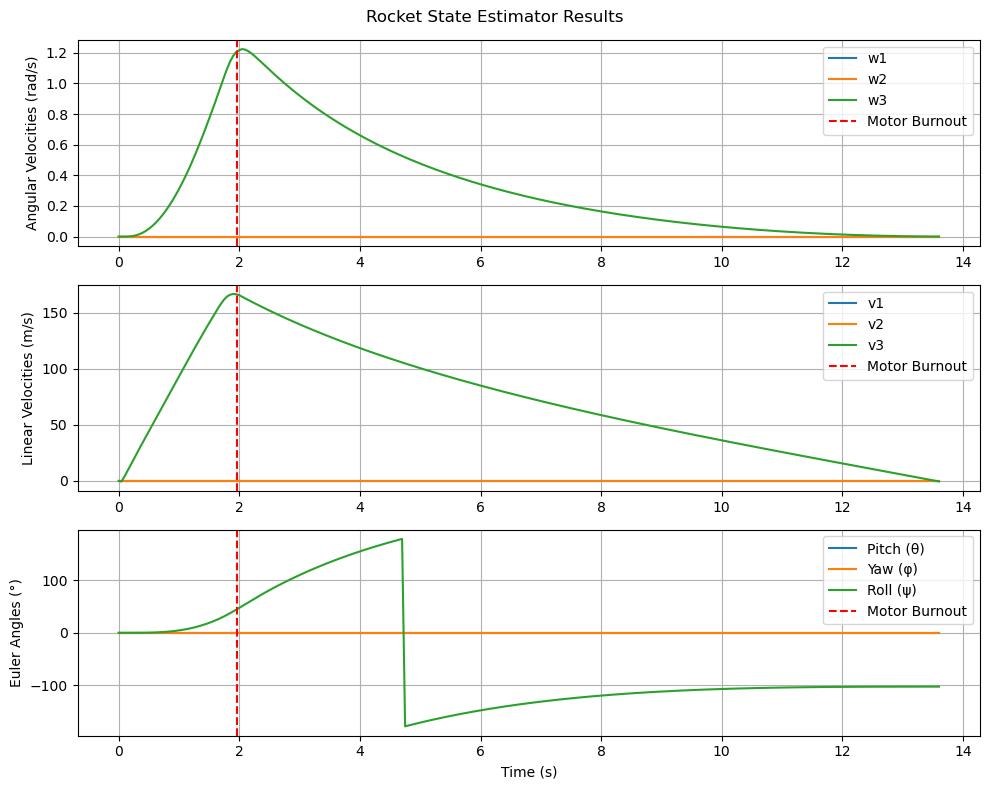

In [67]:
xhat = np.array(dynamics.states)
t = np.arange(0, xhat.shape[0]*dynamics.dt, dynamics.dt)

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=False)
fig.suptitle('Rocket State Estimator Results')
axs[0].plot(t, xhat[:, 0], label='w1')
axs[0].plot(t, xhat[:, 1], label='w2')
axs[0].plot(t, xhat[:, 2], label='w3')
axs[0].axvline(dynamics.t_motor_burnout, color='r', linestyle='--', label='Motor Burnout')
axs[0].set_ylabel('Angular Velocities (rad/s)')
axs[0].legend(loc='upper right')
axs[0].grid()
axs[1].plot(t, xhat[:, 3], label='v1')
axs[1].plot(t, xhat[:, 4], label='v2')
axs[1].plot(t, xhat[:, 5], label='v3')
axs[1].axvline(dynamics.t_motor_burnout, color='r', linestyle='--', label='Motor Burnout')
axs[1].set_ylabel('Linear Velocities (m/s)')
axs[1].legend(loc='upper right')
axs[1].grid()

# Convert quaternion to Euler angles for plotting
euler_angles = np.array([dynamics.quat_to_euler_xyz(q) for q in xhat[:, 6:10]])
axs[2].plot(t, np.rad2deg(euler_angles[:, 0]), label='Pitch (θ)')
axs[2].plot(t, np.rad2deg(euler_angles[:, 1]), label='Yaw (φ)')
axs[2].plot(t, np.rad2deg(euler_angles[:, 2]), label='Roll (ψ)')
axs[2].axvline(dynamics.t_motor_burnout, color='r', linestyle='--', label='Motor Burnout')
axs[2].set_ylabel('Euler Angles (°)')
axs[2].set_xlabel('Time (s)')
axs[2].legend(loc='upper right')
axs[2].grid()
plt.tight_layout()

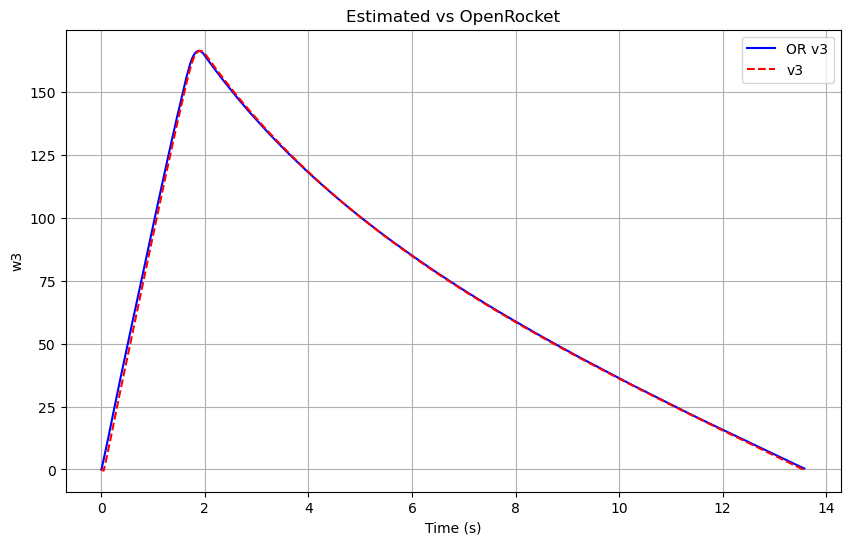

In [70]:
# Compare with OpenRocket data
import pandas as pd
openrocket_data = pd.read_csv("/Users/dsong/Library/CloudStorage/OneDrive-UniversityofIllinois-Urbana/Courses/25-26/Fall 2025/AE 370/370 Projects/370 Project 1/ae370-project1/data/openrocket_data2.csv")
time = openrocket_data['# Time (s)']
mask = time <= t[-1]
v3_or = openrocket_data['Vertical velocity (m/s)'][mask]
w3_or = openrocket_data['Roll rate (°/s)'][mask]
v3_dyn = xhat[:, 5]
w3_dyn = xhat[:, 2]
plt.figure(figsize=(10, 6))
# plt.plot(time[mask], np.deg2rad(w3_or), label='OR w3', color='blue')
# plt.plot(t, w3_dyn, label='w3', color='red', linestyle='--')
plt.plot(time[mask], v3_or, label='OR v3', color='blue')
plt.plot(t, v3_dyn, label='v3', color='red', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('w3')
plt.title('Estimated vs OpenRocket')
plt.legend()
plt.grid()
plt.show()

In [69]:
dynamics.f_params

Matrix([
[-3.48432055749129*w_1*(1.21594904675844e-6*pi*(-15.48*Piecewise((0, atan(sqrt(v_1**2 + v_2**2 + 1.0e-6)/(v_3 + 0.001)) <= 0.001), (Min(pi/12, atan(sqrt(v_1**2 + v_2**2 + 1.0e-6)/(v_3 + 0.001))), True))/pi + 2.73)**2*sqrt(v_1**2 + v_2**2 + v_3**2 + 1.0e-6)*Piecewise((0, atan(sqrt(v_1**2 + v_2**2 + 1.0e-6)/(v_3 + 0.001)) <= 0.001), (Min(pi/12, atan(sqrt(v_1**2 + v_2**2 + 1.0e-6)/(v_3 + 0.001))), True)) + 0.0515524479959411) + 0.98780487804878*w_2*w_3 + 5.38342599807165e-5*pi*(-15.48*Piecewise((0, atan(sqrt(v_1**2 + v_2**2 + 1.0e-6)/(v_3 + 0.001)) <= 0.001), (Min(pi/12, atan(sqrt(v_1**2 + v_2**2 + 1.0e-6)/(v_3 + 0.001))), True))/pi + 2.73)*(v_1**2 + v_2**2 + v_3**2 + 1.0e-6)*Piecewise((0, atan(sqrt(v_1**2 + v_2**2 + 1.0e-6)/(v_3 + 0.001)) <= 0.001), (Min(pi/12, atan(sqrt(v_1**2 + v_2**2 + 1.0e-6)/(v_3 + 0.001))), True))*sin(2*atan2(v_2, v_1 + sqrt(v_1**2 + v_2**2 + 1.0e-6)))],
[-0.98780487804878*w_1*w_3 - 3.48432055749129*w_2*(1.21594904675844e-6*pi*(-15.48*Piecewise((0, atan(sq